# On the mutual information 

**Abstract:** Measure the mutual information between variables and how this condition the inference of labels from data is a very interesting and non-trivial topic. To illustrate some of these ideas, imagine we have digit images $X_i\in X$ (e.g., MNIST) and their labels $y_i \in y$. How can we measure the mutual information between the data $X$ and the labels $y$? How this mutual information can be used as a bound on the classification performance? What happens when training a dnn in terms of the mutual information. 

Refs:
1. Hjelm, R. D. (2018). Mutual Information Neural Estimation.
2. Shwartz-Ziv, R., & Tishby, N. (2017). Opening the Black Box of Deep Neural Networks via Information. 
3. Kraskov, A., & Grassberger, P. (2004). Estimating mutual information.

In [47]:
import numpy as np
import sys
sys.path.append('../libs')
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


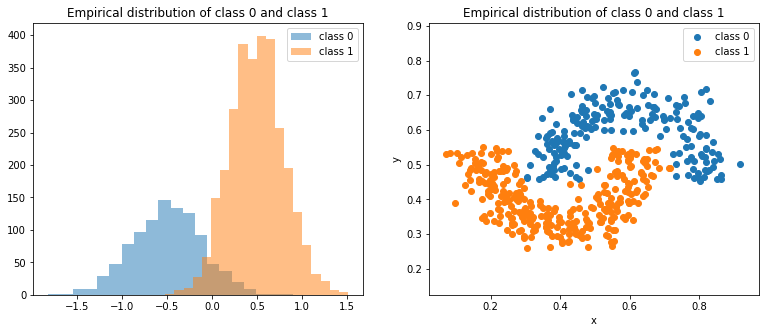

In [57]:
# toy example 1:
plt.figure(figsize=[13,5])
from data import toy_data1, toy_data2
plt.subplot(121); 
X,y = toy_data1(n0=1000, n1=3000, verbose=1)
# toy example 2:
plt.subplot(122);
X,y = toy_data2(n0=200, n1=300, verbose=1)

In [236]:
d = 3
mu = np.random.uniform(low=0, high=1, size=(d,))  # mean
a = np.random.normal(loc=1, scale=.1, size=(d,d))  
cov = a*a.T 
u,s,vh = np.linalg.svd(cov)
print(s)

s = np.array([k if k>1 else 1 for k in s])
print(s)

cov = np.dot(u * s, vh)
print(cov)

N = 100
X = np.random.multivariate_normal(mu, cov, size=(N,))

[2.83737606 0.25406935 0.0520743 ]
[2.83737606 1.         1.        ]
[[0.11533754 1.19607819 1.26703935]
 [1.19607819 0.28266375 1.35876188]
 [1.26703935 1.35876188 0.43937477]]


/home/matu/.virtualenvs/dnn_tests/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  from ipykernel import kernelapp as app


Continue from here doing the high dimensional multivariate 
http://www.aishack.in/tutorials/generating-multivariate-gaussian-random/
https://stackoverflow.com/questions/44600488/draw-multivariate-gaussian-distribution-samples-using-python-numpy-random-randn

### 

In [75]:
cov

array([[0.78887964, 0.13336696],
       [0.13336696, 0.59077455]])